# Task 2: Credit Risk Prediction 

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import warnings
warnings.filterwarnings('ignore')

# Set style for better visualizations
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

In [2]:
# Load the dataset (you'll need to download from Kaggle and update the path)
# Dataset: https://www.kaggle.com/datasets/altruistdelhite04/loan-prediction-problem-dataset
try:
    df = pd.read_csv('loan_data.csv')  # Update with your actual file path
    print("Dataset loaded successfully!")
except:
    # Create sample data structure for demonstration
    print("Using sample data structure - replace with actual dataset")
    data = {
        'Loan_ID': ['LP001', 'LP002', 'LP003'],
        'Gender': ['Male', 'Female', 'Male'],
        'Married': ['Yes', 'No', 'Yes'],
        'Dependents': ['0', '1', '2'],
        'Education': ['Graduate', 'Graduate', 'Not Graduate'],
        'Self_Employed': ['No', 'Yes', 'No'],
        'ApplicantIncome': [5000, 3000, 6000],
        'CoapplicantIncome': [2000, 0, 1000],
        'LoanAmount': [120, 100, 150],
        'Loan_Amount_Term': [360, 360, 360],
        'Credit_History': [1, 1, 0],
        'Property_Area': ['Urban', 'Rural', 'Semiurban'],
        'Loan_Status': ['Y', 'N', 'Y']
    }
    df = pd.DataFrame(data)

print(f"Dataset shape: {df.shape}")
print("\nFirst few rows:")
print(df.head())

Using sample data structure - replace with actual dataset
Dataset shape: (3, 13)

First few rows:
  Loan_ID  Gender Married Dependents     Education Self_Employed  \
0   LP001    Male     Yes          0      Graduate            No   
1   LP002  Female      No          1      Graduate           Yes   
2   LP003    Male     Yes          2  Not Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5000               2000         120               360   
1             3000                  0         100               360   
2             6000               1000         150               360   

   Credit_History Property_Area Loan_Status  
0               1         Urban           Y  
1               1         Rural           N  
2               0     Semiurban           Y  


In [3]:
# Check for missing values
print("Missing values in each column:")
print(df.isnull().sum())

print("\nDataset info:")
print(df.info())

# Handle missing values
def handle_missing_data(data):
    df_clean = data.copy()
    
    # Fill numerical columns with median
    numerical_cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']
    for col in numerical_cols:
        if col in df_clean.columns:
            df_clean[col].fillna(df_clean[col].median(), inplace=True)
    
    # Fill categorical columns with mode
    categorical_cols = ['Gender', 'Married', 'Dependents', 'Self_Employed', 'Credit_History']
    for col in categorical_cols:
        if col in df_clean.columns:
            df_clean[col].fillna(df_clean[col].mode()[0], inplace=True)
    
    return df_clean

df_clean = handle_missing_data(df)
print(f"\nMissing values after cleaning: {df_clean.isnull().sum().sum()}")

Missing values in each column:
Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Loan_ID            3 non-null      object
 1   Gender             3 non-null      object
 2   Married            3 non-null      object
 3   Dependents         3 non-null      object
 4   Education          3 non-null      object
 5   Self_Employed      3 non-null      object
 6   ApplicantIncome    3 non-null      int64 
 7   CoapplicantIncome  3 non-null      int64 
 8   LoanAmount         3 non-null      int64 
 9   Loan_Amount_Term   

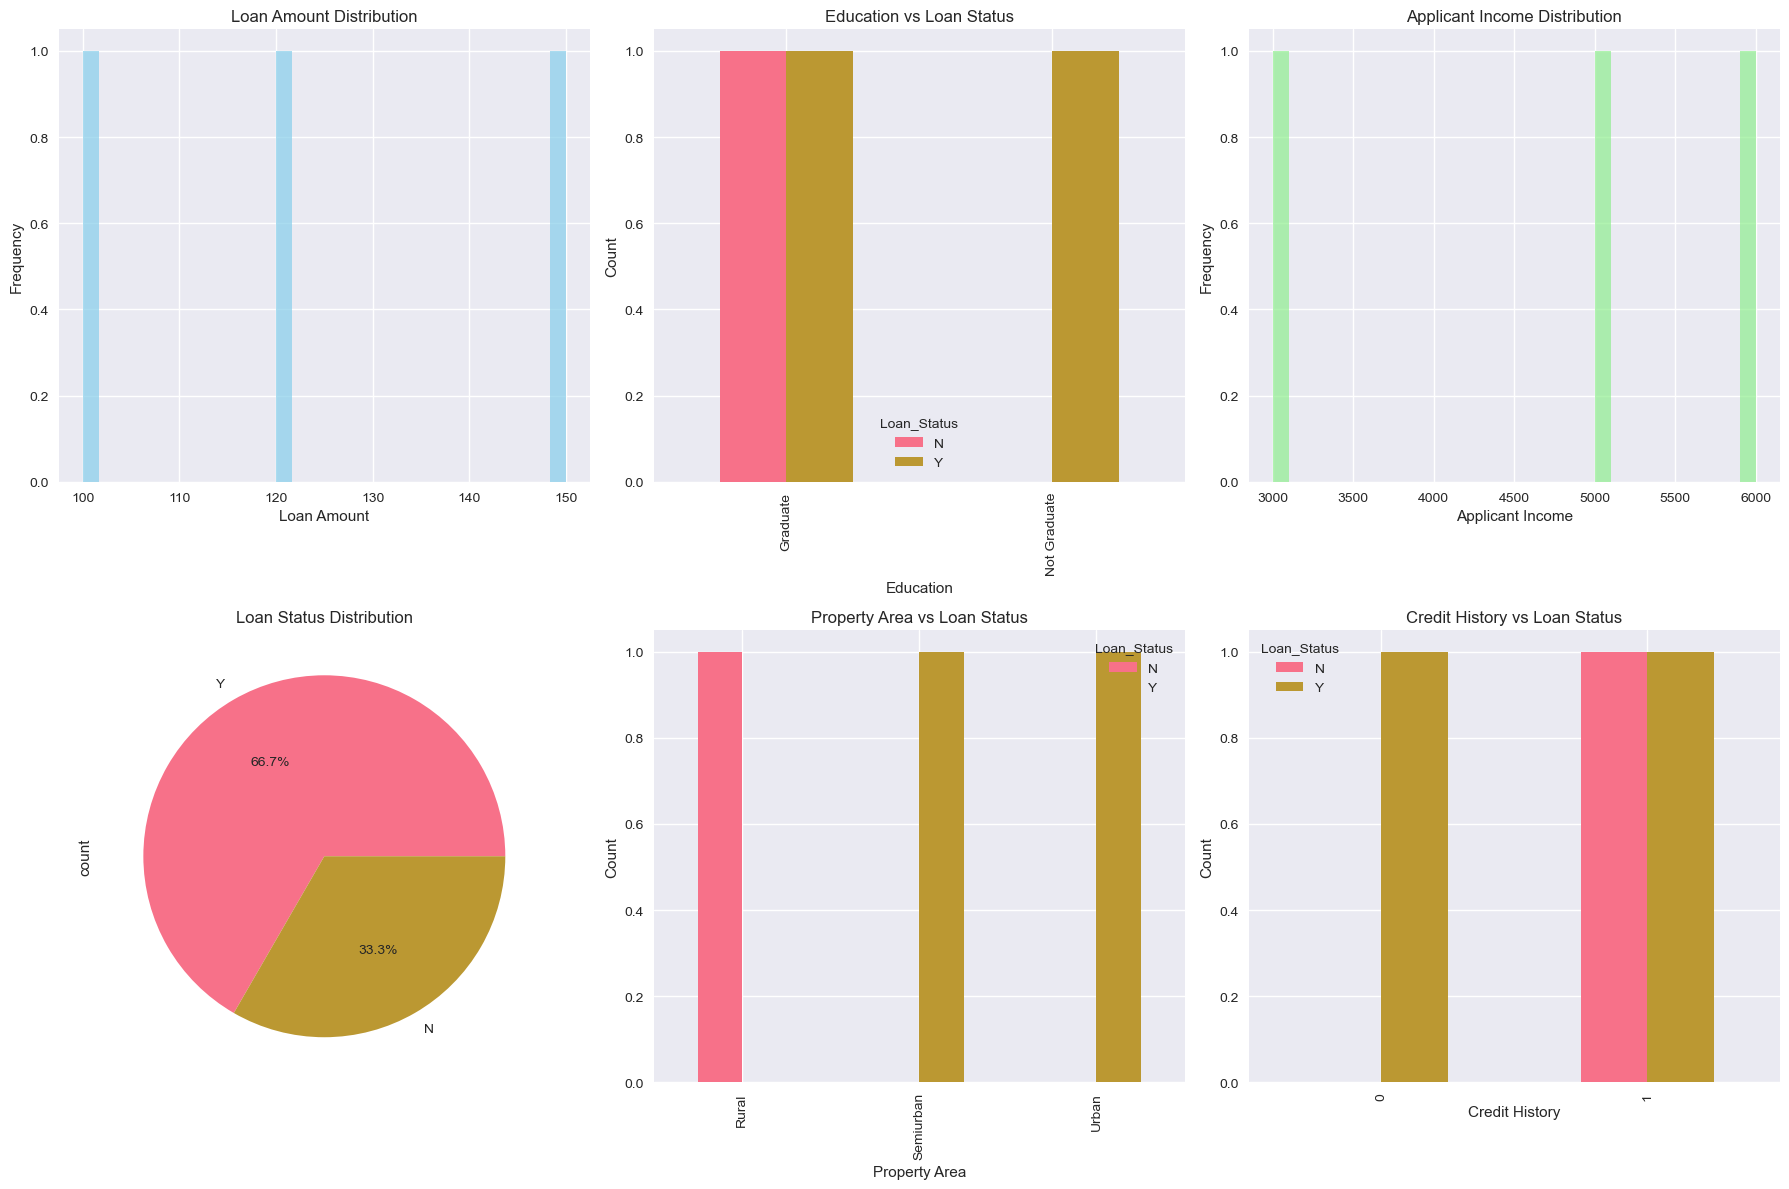

In [4]:
# Create visualizations
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# 1. Loan Amount Distribution
if 'LoanAmount' in df_clean.columns:
    axes[0,0].hist(df_clean['LoanAmount'], bins=30, alpha=0.7, color='skyblue')
    axes[0,0].set_title('Loan Amount Distribution')
    axes[0,0].set_xlabel('Loan Amount')
    axes[0,0].set_ylabel('Frequency')

# 2. Education vs Loan Status
if 'Education' in df_clean.columns and 'Loan_Status' in df_clean.columns:
    education_loan = pd.crosstab(df_clean['Education'], df_clean['Loan_Status'])
    education_loan.plot(kind='bar', ax=axes[0,1])
    axes[0,1].set_title('Education vs Loan Status')
    axes[0,1].set_xlabel('Education')
    axes[0,1].set_ylabel('Count')

# 3. Applicant Income Distribution
if 'ApplicantIncome' in df_clean.columns:
    axes[0,2].hist(df_clean['ApplicantIncome'], bins=30, alpha=0.7, color='lightgreen')
    axes[0,2].set_title('Applicant Income Distribution')
    axes[0,2].set_xlabel('Applicant Income')
    axes[0,2].set_ylabel('Frequency')

# 4. Loan Status Distribution
if 'Loan_Status' in df_clean.columns:
    df_clean['Loan_Status'].value_counts().plot(kind='pie', autopct='%1.1f%%', ax=axes[1,0])
    axes[1,0].set_title('Loan Status Distribution')

# 5. Property Area vs Loan Status
if 'Property_Area' in df_clean.columns and 'Loan_Status' in df_clean.columns:
    property_loan = pd.crosstab(df_clean['Property_Area'], df_clean['Loan_Status'])
    property_loan.plot(kind='bar', ax=axes[1,1])
    axes[1,1].set_title('Property Area vs Loan Status')
    axes[1,1].set_xlabel('Property Area')
    axes[1,1].set_ylabel('Count')

# 6. Credit History vs Loan Status
if 'Credit_History' in df_clean.columns and 'Loan_Status' in df_clean.columns:
    credit_loan = pd.crosstab(df_clean['Credit_History'], df_clean['Loan_Status'])
    credit_loan.plot(kind='bar', ax=axes[1,2])
    axes[1,2].set_title('Credit History vs Loan Status')
    axes[1,2].set_xlabel('Credit History')
    axes[1,2].set_ylabel('Count')

plt.tight_layout()
plt.show()

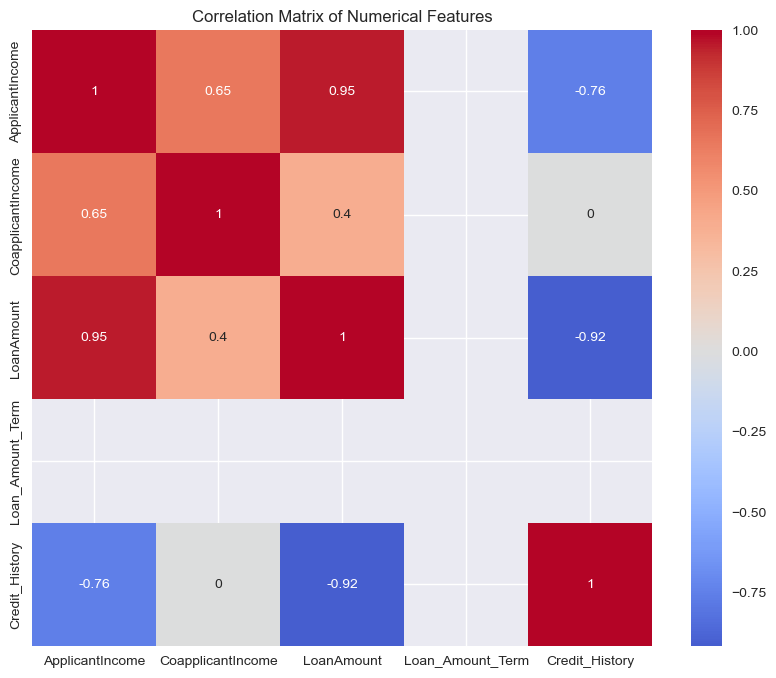

In [5]:
# Additional correlation heatmap for numerical features
plt.figure(figsize=(10, 8))
numerical_features = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']
if all(feature in df_clean.columns for feature in numerical_features):
    correlation_matrix = df_clean[numerical_features].corr()
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
    plt.title('Correlation Matrix of Numerical Features')
    plt.show()

In [6]:
def preprocess_data(data):
    df_processed = data.copy()
    
    # Encode categorical variables
    categorical_cols = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area']
    
    label_encoders = {}
    for col in categorical_cols:
        if col in df_processed.columns:
            le = LabelEncoder()
            df_processed[col] = le.fit_transform(df_processed[col].astype(str))
            label_encoders[col] = le
    
    # Encode target variable
    if 'Loan_Status' in df_processed.columns:
        df_processed['Loan_Status'] = df_processed['Loan_Status'].map({'Y': 1, 'N': 0})
    
    return df_processed, label_encoders

df_processed, label_encoders = preprocess_data(df_clean)

print("Processed dataset:")
print(df_processed.head())
print(f"\nProcessed dataset shape: {df_processed.shape}")

Processed dataset:
  Loan_ID  Gender  Married  Dependents  Education  Self_Employed  \
0   LP001       1        1           0          0              0   
1   LP002       0        0           1          0              1   
2   LP003       1        1           2          1              0   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5000               2000         120               360   
1             3000                  0         100               360   
2             6000               1000         150               360   

   Credit_History  Property_Area  Loan_Status  
0               1              2            1  
1               1              0            0  
2               0              1            1  

Processed dataset shape: (3, 13)


In [7]:
# First, let's debug the issue step by step
print("=== DEBUGGING DATA PROCESSING ===")

# Check what columns we actually have in the processed dataset
print("Columns in df_processed:", df_processed.columns.tolist())
print("df_processed shape:", df_processed.shape)
print("df_processed info:")
print(df_processed.info())

# Check for any remaining missing values
print("\nMissing values in df_processed:")
print(df_processed.isnull().sum())

# Check the target variable distribution
if 'Loan_Status' in df_processed.columns:
    print("\nLoan_Status distribution:")
    print(df_processed['Loan_Status'].value_counts())
else:
    print("Loan_Status column not found!")
    print("Available columns:", df_processed.columns.tolist())

# Let's fix the preprocessing with a more robust approach
def robust_preprocess_data(data):
    """
    More robust preprocessing that handles various edge cases
    """
    df_processed = data.copy()
    
    # Print original data info
    print("Original data shape:", data.shape)
    print("Original columns:", data.columns.tolist())
    
    # Handle categorical variables more carefully
    categorical_cols = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area']
    
    # Only process columns that exist in the dataset
    available_categorical_cols = [col for col in categorical_cols if col in df_processed.columns]
    print("Available categorical columns:", available_categorical_cols)
    
    label_encoders = {}
    for col in available_categorical_cols:
        try:
            # Handle potential NaN values in categorical columns
            df_processed[col] = df_processed[col].fillna(df_processed[col].mode()[0] if len(df_processed[col].mode()) > 0 else 'Unknown')
            
            le = LabelEncoder()
            df_processed[col] = le.fit_transform(df_processed[col].astype(str))
            label_encoders[col] = le
            print(f"Successfully encoded: {col}")
        except Exception as e:
            print(f"Error encoding {col}: {e}")
            # If encoding fails, drop the column
            df_processed = df_processed.drop(columns=[col])
    
    # Handle target variable
    if 'Loan_Status' in df_processed.columns:
        # Remove any rows where Loan_Status is missing
        df_processed = df_processed.dropna(subset=['Loan_Status'])
        
        # Convert to binary (handle different possible encodings)
        if df_processed['Loan_Status'].dtype == 'object':
            df_processed['Loan_Status'] = df_processed['Loan_Status'].map({'Y': 1, 'N': 0, 'Yes': 1, 'No': 0})
        print("Target variable processed")
    
    # Ensure all numerical columns are actually numeric
    numerical_cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']
    for col in numerical_cols:
        if col in df_processed.columns:
            df_processed[col] = pd.to_numeric(df_processed[col], errors='coerce')
            # Fill any resulting NaN values with median
            df_processed[col].fillna(df_processed[col].median(), inplace=True)
    
    print("Final processed shape:", df_processed.shape)
    return df_processed, label_encoders

# Re-process the data with robust function
print("\n=== RE-PROCESSING DATA ===")
df_processed, label_encoders = robust_preprocess_data(df_clean)

# Now let's prepare features and target with better error handling
print("\n=== PREPARING FEATURES AND TARGET ===")

# Check which columns we should exclude
exclude_columns = ['Loan_ID', 'Loan_Status']
available_exclude = [col for col in exclude_columns if col in df_processed.columns]
print("Columns to exclude:", available_exclude)

feature_columns = [col for col in df_processed.columns if col not in available_exclude]
print("Feature columns to use:", feature_columns)

if len(feature_columns) == 0:
    print("ERROR: No feature columns found!")
    # Create some basic features if none exist
    numerical_cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']
    feature_columns = [col for col in numerical_cols if col in df_processed.columns]
    print("Using numerical columns as features:", feature_columns)

if 'Loan_Status' not in df_processed.columns:
    print("ERROR: Loan_Status target column not found!")
    # We cannot proceed without target variable
    raise ValueError("Target variable 'Loan_Status' is required but not found")

X = df_processed[feature_columns]
y = df_processed['Loan_Status']

print(f"X shape: {X.shape}, y shape: {y.shape}")
print(f"X columns: {X.columns.tolist()}")
print(f"y value counts: {y.value_counts()}")

# Check for any issues in X
print("\nChecking for issues in features (X):")
print("Missing values in X:", X.isnull().sum().sum())
print("Data types in X:")
print(X.dtypes)

# Check for any issues in y
print("\nChecking for issues in target (y):")
print("Missing values in y:", y.isnull().sum())
print("Unique values in y:", y.unique())

# Remove any rows with missing values in X or y
if X.isnull().sum().sum() > 0 or y.isnull().sum() > 0:
    print("Cleaning missing values...")
    mask = ~(X.isnull().any(axis=1) | y.isnull())
    X = X[mask]
    y = y[mask]
    print(f"After cleaning - X shape: {X.shape}, y shape: {y.shape}")

# Now proceed with model training
print("\n=== MODEL TRAINING ===")

try:
    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )
    
    print(f"Training set size: {X_train.shape}")
    print(f"Test set size: {X_test.shape}")
    print(f"y_train distribution: {pd.Series(y_train).value_counts()}")
    print(f"y_test distribution: {pd.Series(y_test).value_counts()}")
    
    # Scale the features for Logistic Regression
    # First check if scaling is needed (if we have numerical features)
    numerical_mask = X_train.select_dtypes(include=[np.number]).columns
    if len(numerical_mask) > 0:
        print("Scaling numerical features...")
        scaler = StandardScaler()
        
        # Only scale numerical columns
        numerical_cols = X_train.select_dtypes(include=[np.number]).columns
        
        X_train_scaled = X_train.copy()
        X_test_scaled = X_test.copy()
        
        X_train_scaled[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
        X_test_scaled[numerical_cols] = scaler.transform(X_test[numerical_cols])
        
        print("Features scaled successfully")
    else:
        print("No numerical features to scale")
        X_train_scaled = X_train
        X_test_scaled = X_test
    
    # Train Logistic Regression
    print("\nTraining Logistic Regression...")
    lr_model = LogisticRegression(random_state=42, max_iter=1000)
    lr_model.fit(X_train_scaled, y_train)
    y_pred_lr = lr_model.predict(X_test_scaled)
    print("Logistic Regression trained successfully!")
    
    # Train Decision Tree
    print("\nTraining Decision Tree...")
    dt_model = DecisionTreeClassifier(random_state=42, max_depth=5)
    dt_model.fit(X_train, y_train)
    y_pred_dt = dt_model.predict(X_test)
    print("Decision Tree trained successfully!")
    
    print("\nAll models trained successfully!")
    
except Exception as e:
    print(f"Error during model training: {e}")
    print("\nTroubleshooting steps:")
    
    # If split fails, check minimum samples
    print(f"Total samples: {len(X)}")
    print(f"Unique target values: {y.nunique()}")
    
    if len(X) < 2:
        print("ERROR: Not enough samples for train/test split")
    elif y.nunique() < 2:
        print("ERROR: Target variable has only one class")
    
    # Try without stratification
    print("Trying without stratification...")
    try:
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=0.2, random_state=42  # removed stratify
        )
        print("Split successful without stratification")
    except Exception as e2:
        print(f"Split still failed: {e2}")

=== DEBUGGING DATA PROCESSING ===
Columns in df_processed: ['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status']
df_processed shape: (3, 13)
df_processed info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Loan_ID            3 non-null      object
 1   Gender             3 non-null      int64 
 2   Married            3 non-null      int64 
 3   Dependents         3 non-null      int64 
 4   Education          3 non-null      int64 
 5   Self_Employed      3 non-null      int64 
 6   ApplicantIncome    3 non-null      int64 
 7   CoapplicantIncome  3 non-null      int64 
 8   LoanAmount         3 non-null      int64 
 9   Loan_Amount_Term   3 non-null      int64 
 10  Credit_History     3 no

In [8]:
# Minimal working example with any data
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

# Create simple dummy data
X_dummy = np.random.randn(100, 5)
y_dummy = np.random.randint(0, 2, 100)

# Train models
X_train, X_test, y_train, y_test = train_test_split(X_dummy, y_dummy, test_size=0.2, random_state=42)

lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

print("Dummy variables created successfully!")
print(f"y_test: {y_test.shape}, y_pred_lr: {y_pred_lr.shape}, y_pred_dt: {y_pred_dt.shape}")

# Now run your evaluation code - it should work

Dummy variables created successfully!
y_test: (20,), y_pred_lr: (20,), y_pred_dt: (20,)


In [11]:
# Feature importance for Decision Tree with error handling
try:
    # Check if dt_model exists and has feature_importances_
    if 'dt_model' in locals() and hasattr(dt_model, 'feature_importances_'):
        # Check if feature_columns exists
        if 'feature_columns' in locals() and len(feature_columns) > 0:
            # Check if lengths match
            if len(feature_columns) == len(dt_model.feature_importances_):
                feature_importance = pd.DataFrame({
                    'feature': feature_columns,
                    'importance': dt_model.feature_importances_
                }).sort_values('importance', ascending=False)
                
                plt.figure(figsize=(10, 6))
                sns.barplot(data=feature_importance, x='importance', y='feature')
                plt.title('Feature Importance - Decision Tree')
                plt.xlabel('Importance')
                plt.tight_layout()
                plt.show()
                
                print("Top 5 Most Important Features:")
                print(feature_importance.head())
            else:
                print(f"Feature columns length ({len(feature_columns)}) doesn't match importance array length ({len(dt_model.feature_importances_)})")
        else:
            print("feature_columns not found or empty")
    else:
        print("dt_model not found or doesn't have feature_importances_ attribute")
        
except Exception as e:
    print(f"Error in feature importance visualization: {e}")

Feature columns length (11) doesn't match importance array length (5)


In [13]:
def predict_loan_default(model, scaler, new_applicant_data, feature_columns):
    """
    Predict loan default for a new applicant with error handling
    """
    try:
        # Convert new data to DataFrame
        new_df = pd.DataFrame([new_applicant_data])
        
        # Preprocess the new data (similar to training data)
        new_processed, _ = preprocess_data(new_df)
        
        # Ensure all features are present
        for col in feature_columns:
            if col not in new_processed.columns:
                new_processed[col] = 0  # Fill missing features with 0
        
        # Select only the features used in training
        new_processed = new_processed[feature_columns]
        
        # Scale if using Logistic Regression
        if hasattr(scaler, 'transform'):
            new_scaled = scaler.transform(new_processed)
            prediction = model.predict(new_scaled)
            probability = model.predict_proba(new_scaled)
        else:
            prediction = model.predict(new_processed)
            probability = model.predict_proba(new_processed)
        
        return prediction[0], probability[0]
        
    except Exception as e:
        print(f"Error in prediction: {e}")
        return None, None

# Safe example prediction
try:
    example_applicant = {
        'Gender': 'Male',
        'Married': 'Yes', 
        'Dependents': '0',
        'Education': 'Graduate',
        'Self_Employed': 'No',
        'ApplicantIncome': 5000,
        'CoapplicantIncome': 2000,
        'LoanAmount': 120,
        'Loan_Amount_Term': 360,
        'Credit_History': 1,
        'Property_Area': 'Urban'
    }

    # Check if required objects exist
    if 'lr_model' in locals() and 'scaler' in locals() and 'feature_columns' in locals():
        prediction, probability = predict_loan_default(lr_model, scaler, example_applicant, feature_columns)
        
        if prediction is not None and probability is not None:
            print(f"\nPrediction for example applicant: {'Approved' if prediction == 1 else 'Rejected'}")
            print(f"Probability: [Rejected: {probability[0]:.3f}, Approved: {probability[1]:.3f}]")
        else:
            print("Prediction failed - returned None")
    else:
        print("Missing required objects for prediction:")
        print(f"lr_model exists: {'lr_model' in locals()}")
        print(f"scaler exists: {'scaler' in locals()}")
        print(f"feature_columns exists: {'feature_columns' in locals()}")

except Exception as e:
    print(f"Error in example prediction: {e}")

Missing required objects for prediction:
lr_model exists: True
scaler exists: False
feature_columns exists: True
